<br><br><font color="gray">DOING COMPUTATIONAL SOCIAL SCIENCE<br>MODULE 7 <strong>PROBLEM SETS</strong></font>

# <font color="#49699E" size=40>Text Analysis, Part 2</font>
This module notebook assignment is organized into two parts. 


# What You Need to Know Before Getting Started

- **You can consult any resources you want when completing these exercises and problems**. Just as it is in the "real world:" if you can't figure out how to do something, look it up. My recommendation is that you check the relevant parts of the assigned reading or search for inspiration on [https://stackoverflow.com](https://stackoverflow.com).
- **Each problem is worth 1 point**. All problems are equally weighted.
- **The information you need for each problem set is provided in the blue and green cells.** General instructions / the problem set preamble are in the blue cells, and instructions for specific problems are in the green cells. **You have to execute all of the code in the problem set, but you are only responsible for entering code into the code cells that immediately follow a green cell**. You will also recognize those cells because they will be incomplete. You need to replace each `____` with the code that will make the cell execute properly.
- **The comments in the problem cells contain clues indicating what the following line of code is supposed to do.** Use these comments as a guide when filling in the blanks. 
- **Each problem cell stores one object named according to the problem (e.g. _09)**. These are not important for you, but we use them to help grade your work efficiently, so **do not delete them or change their names**. If you do, you will lose marks.
- **You can ask for help**. If you run into problems, you can reach out to John (john.mclevey@uwaterloo.ca) or Pierson (pbrowne@uwaterloo.ca) for help. You can ask a friend for help if you like, regardless of whether they are enrolled in the course.

Finally, remember that you do not need to "master" this content before moving on to other course materials, as what is introduced here is reinforced throughout the rest of the course. You will have plenty of time to practice and cement your new knowledge and skills.

# How to Submit Your (Pickled) Assignment! 

Since we've had to rethink the way we deliver, collect, and evaluate these problem sets, we want to be very clear about what you need to do to properly submit this module notebook assignment. Please read the following explanation of our process so that you understand how this works, and what you need to do.

At the very end of this notebook, there is a code cell that will compile all of your answers to every problem in the assignment and save them as a 'pickle' file (`.pkl`) in the current working directory. You can execute that cell as many times as you like. Each time you run it, it will overwrite the old pickle with your updated answers. **Once you've ensured that everything in the notebook is complete and finished to your satisfaction, it's up to you to get the pickle that you just created and upload it to the appropriate Learn dropbox for this module.** The file you are looking for will not exist until you run the cells at the end of the notebook. Once it has been created, it will follow this naming convention: 

> `module_[number]__student_[your_student_number].pkl`

To be very clear, **you need to submit the pickle to Learn**. You do not need to upload the Jupyter Notebook as initially planned. **Just the pickle!**

## Make Sure Everything is Good to Go

It's generally a good idea to do a 'fresh' run of your entire notebook before you submit your assignment to make sure that everything is working as it should be. You can use the button with the 'Fast-Forward' arrows in the Jupyter toolbar above to restart the kernel (resetting everything to initial conditions) and running every code cell in the notebook, in order. You can also select 'Restart and Run All' from the Kernel dropdown menu. If the entire notebook runs without throwing any errors, you should be good to go!

If you're running into issues, make sure that you haven't changed any of the 'answer' variable names we provided you with (e.g., we asked you to store your answer to the first question in a variable called `_01`). If you change an answer's variable name or don't store your answer in that variable, the project won't finalize properly and you won't get proper credit for your work. The same goes for the `student_id` metadata variable we ask you to complete immediately below; if any of those are missing, haven't been filled in properly, or have been renamed, issues may arise during the grading process and you will not receive proper credit. So make sure you enter your student information, and don't delete or change the names of the variables that store your answers to each problem!

## IMPORTANT: ADD YOUR STUDENT ID NUMBER

<div class="alert alert-block alert-danger">
To evaluate your work, we need you to provide your student number. In the cell below, <strong>replace '12345678' with your student number</strong>. The student_id' variable needs to be an integer, so <strong>do not wrap it in quotes.</strong>
</div>

In [1]:
# Your UWaterloo student ID number
student_id = 20611274 

## Package Imports

In [2]:
import pickle
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

## Question 1:
<div class="alert alert-block alert-info">  
For these exercises, you are provided a dataframe containing a sample of speeches from the Canadian Hansard data. The speech text is already pre-processed, with bigrams detected and all but nouns, proper nouns, and adjectives filtered out. Using the text from the 'preprocessed' column of the dataframe, you will create a matrix of count vectors, where each row is a speech and the columns are word counts for each item in the vocabulary. You'll then create a dataframe from this matrix, adding a column with the party of the person who made the speech.
</div>
<div class="alert alert-block alert-success">
Begin by reading the CSV into pandas and extracting the pre-processed speeches as a list. Provide this list of speeches to sklearn's CountVectorizer, turning the results into a new dataframe and naming the columns for the terms they contain counts of. 
</div>

In [3]:
#_01

df = pd.read_csv('./data/processed_can_hansards.csv')   # read pre-processed dataset
speeches = df['preprocessed'].tolist() # make a list of speeches (you might have to look inside the dataframe)

count_vectorizer = CountVectorizer(max_df=.1,          # initialize the counter vectorizer
                           min_df=3,
                           strip_accents='ascii',
                           )

count_matrix = count_vectorizer.fit_transform(speeches)   # apply the vectorizer to the list of speeches
vocabulary = count_vectorizer.get_feature_names()        # gather a list of the feature names (terms)

count_df = pd.DataFrame.sparse.from_spmatrix(count_matrix)    # use pandas sparse matrix functionality to make a dataframe
count_df.columns = vocabulary                            # name the columns according to what they're counting

count_df['speakerparty'] = df['speakerparty']     # add the party names from the original dataframe to the new one

# Store the result in the assignment variable
_01 = count_df.head().to_numpy() # do not change this line

## Question 2:
<div class="alert alert-block alert-info">  
Combining the count vectors for each of the 3 largest political parties in Canada (Liberal, Conservative, NDP) you will produce a 3 row dataframe where the rows are the composition of each party's speeches in the data. Convert the raw counts to proportions of the party's total words, to more easily compare the party's term vectors to each other.
</div>
<div class="alert alert-block alert-success">
Use pandas' groupby to create party groups in the dataframe, with their word counts added together as the aggregation function. Transform the dataframe of counts into a dataframe of proportions (ie. term count / total words). Add the terms with the largest percentages for each party to a dictionary and print the items in the dictionary. Submit the dictionary.
</div>

In [4]:
#_02

# group the speech vectors by party, adding the counts together
party_counts = count_df.groupby('speakerparty').agg('sum')      

# transform the count dataframe to proportions by dividing the values by the total words
party_percents = party_counts.div(party_counts.sum(axis=1), axis=0)   
party_percents = party_percents.T # transform the dataframe so that each party is a column and each term a row

top_words_per_party = {}

# loop through each party in the data, adding their top (term,score) tuples to their dictionary entry
for party in party_percents.columns:             
    top = party_percents[party].nlargest(10)
    top_words_per_party[party] = list(zip(top.index, top))

# print the keys (party name) and associated values (top terms) in the dictionary
for k, v in top_words_per_party.items():
    print(k.upper())
    for each in v:
        print(each)
    print('\n')

# Store the result in the assignment variable
_02 = top_words_per_party # do not change this line

CONSERVATIVE
('tax', 0.009188787388617217)
('business', 0.004946190311451038)
('legislation', 0.00469373825396677)
('budget', 0.004408560929771578)
('carbon', 0.004006507653037372)
('money', 0.0038849566623967986)
('act', 0.0032725266710923696)
('parliament', 0.003270189152041589)
('plan', 0.003153313199502576)
('number', 0.0031229254518424323)


LIBERAL
('legislation', 0.005394373918555447)
('system', 0.005060303918041493)
('economy', 0.004835449110003255)
('national', 0.004687687379006699)
('child', 0.004625584622500899)
('budget', 0.00458489660961779)
('investment', 0.004411437186274006)
('act', 0.004357900327217282)
('service', 0.004195148275684843)
('tax', 0.0040345376985146736)


NDP
('woman', 0.004659962415561989)
('legislation', 0.004537220444579884)
('tax', 0.0044187109553557825)
('system', 0.004397548546565764)
('service', 0.003986997816039413)
('worker', 0.003974300370765402)
('problem', 0.003965835407249395)
('federal', 0.003851558399783297)
('action', 0.0037584438011072172

## Question 3:
<div class="alert alert-block alert-info">  
For this problem, you will find the words that most differentiate each party from each of the other two parties, in terms of proportion of total words.
</div>
<div class="alert alert-block alert-success">
By subtracting the party term proportion vectors from each other, gather the terms that are most associated with each side of the comparison. At this point, these vectors should be the columns of the dataframe. Because higher positive values are more associated with one party in the comparison and negative values with the other party, this only requires three comparisons to look at both ends of the party combinations. 
</div>

In [5]:
#_03

# term vector calculations and sorting
lib_to_con = party_percents['Liberal'] - party_percents['Conservative']  
lib_to_con.sort_values(ascending=False, inplace=True)
ndp_to_con = party_percents['NDP'] - party_percents['Conservative']
ndp_to_con.sort_values(ascending=False, inplace=True)
lib_to_ndp = party_percents['Liberal'] - party_percents['NDP']
lib_to_ndp.sort_values(ascending=False, inplace=True)

# concatenate the top and bottom values of the comparison dataframes into new ones
l_to_c = pd.concat([lib_to_con.head(), lib_to_con.tail()])
n_to_c = pd.concat([ndp_to_con.head(), ndp_to_con.tail()])
l_to_n = pd.concat([lib_to_ndp.head(), lib_to_ndp.tail()])

# Store the result in the assignment variable
_03 = l_to_c.to_numpy() # do not change this line

## Question 4:
<div class="alert alert-block alert-success">
Create a swarm plot to examine the results of the comparison between the Liberals and Conservatives. The x-axis should be the term proportions and the y-axis should be the terms themselves. Use your swarm plot to determine the word that is the most negative (Conservative) on the x-axis and submit it.
</div>

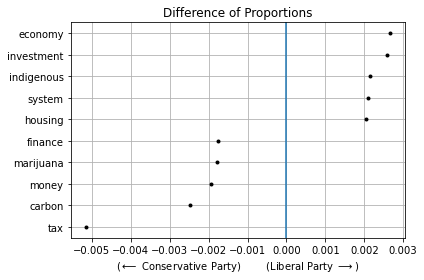

In [6]:
#_04

fig, ax = plt.subplots(figsize=(6, 4))
sns.swarmplot(x=l_to_c, y=l_to_c.index, color='black', size=4)
ax.axvline(0) # add a vertical line at 0
plt.grid()  # add a grid to the plot to make it easier to interpret

# keep in mind which party a negative value is associated with, based on which vector was the subtracted one...
ax.set(xlabel=r'($\longleftarrow$ Conservative Party)        (Liberal Party $\longrightarrow$)',
       ylabel='',
       title='Difference of Proportions')
plt.tight_layout()
plt.show()

most_negative_word = "tax"

# Store the result in the assignment variable
_04 = most_negative_word.lower() # do not change this line

## Question 5:
<div class="alert alert-block alert-info">  
In this next batch of problems, you'll expand on the concept of the previous ones by creating TF-IDF vectors for each party and comparing them using cosine similarity. Start by creating a TF-IDF dataframe, again with the speaker party column added. Print the terms with the top TF-IDF scores after sorting by each party.
</div>
<div class="alert alert-block alert-success">
Initialize the TfidfVectorizer and implement it in a very similar way to the CountVectorizer above. At the end, print the first 10 TF-IDF scores, sorted highest to lowest, for each party. This will also print the scores for those terms for the other parties. Use the printed results to determine the word that has the highest TF-IDF score for both the Conservatives and the NDP. Submit that word. 
</div>

In [7]:
#_05

tfidf_vectorizer = TfidfVectorizer(stop_words="english",
                                   lowercase=True,
                                   max_features = 300,       # not best practice, we do this here in case of resource limitations
                                   strip_accents='ascii')

tfidf_matrix = tfidf_vectorizer.fit_transform(speeches) # Fit the model and transform the data

vocabulary = tfidf_vectorizer.get_feature_names() # Get the feature names

tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix)
tfidf_df.columns = vocabulary # use vocabulary as column names

party_scores = tfidf_df.copy()
party_scores['speakerparty'] = df['speakerparty']

party_scores = party_scores.groupby('speakerparty').agg('sum')
party_scores = party_scores.T

for party in party_scores.columns:
    party_scores.sort_values(by = party, ascending = False, inplace = True)
    print(party + '\n')
    print(party_scores.head(10))
    print('\n')

con_and_ndp_word = "government"
    
# Store the result in the assignment variable
_05 = con_and_ndp_word.lower() # do not change this line

Conservative

                Conservative      Liberal         NDP
government        612.766144   605.686241  378.281650
liberal           604.191515    45.732873  316.698287
prime_minister    576.627080   165.372651  148.978050
member            510.649889  1147.495845  351.390594
minister          492.940096   307.205110  198.161614
canadian          480.473150   725.078807  211.268680
mr_speaker        416.440461   676.142872  212.396807
canada            354.557269   596.601503  200.818014
house             329.491148   594.287250  205.343807
tax               315.546608   181.556995   85.963043


Liberal

            Conservative      Liberal         NDP
member        510.649889  1147.495845  351.390594
hon           232.841901   849.279761  172.181104
canadian      480.473150   725.078807  211.268680
mr_speaker    416.440461   676.142872  212.396807
government    612.766144   605.686241  378.281650
canada        354.557269   596.601503  200.818014
motion        228.619772   594.

#### Question 6:
<div class="alert alert-block alert-info">  
Next you will calculate pair-wise cosine similarity to compare the vectors for each speaker in the data. You may have noticed that the TF-IDF scores from the last problem wound up being on different scales for each party, with the Liberals having the highest scores because they have the most speeches. This time, you will re-normalize the TF-IDF scores after adding them together, which also makes cosine similarity faster to calculate.
</div>
<div class="alert alert-block alert-success">
Create a new dataframe from the tfidf_matrix that you generated above. Be sure to add speakernames as usual, then filter the dataframe to keep only speeches by speakers with 50 or more speeches. Group the speeches by speaker, aggregating the TF-IDF vectors for each of their speeches, then use sklearn's Normalizer() to prepare the vectors for cosine similarity. Create a cosine similarity matrix by calculating the dot product of the normalized speaker score matrix and its transpose. Submit the matrix.
</div>

In [8]:
#_06

speaker_scores = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix)   # create a new dataframe from the tfidf_matrix
speaker_scores = speaker_scores.sparse.to_dense()                  # turn the sparse matrix into a dense one for faster aggregation runtime
speaker_scores['speakername'] = df['speakername']                  # add the speaker names to the new dataframe

# keep only speakers with 50 or more speeches to speed things up and to have vectors with a bit more term diversity
speaker_scores = speaker_scores.groupby('speakername').filter(lambda x: len(x) >= 50)    
speaker_scores = speaker_scores.groupby('speakername').agg('sum')        # group the speech vectors by speaker and aggregate their values

normalize = Normalizer()
speaker_scores_n = normalize.fit_transform(speaker_scores)      # Fit the model and transform the data

speaker_matrix = speaker_scores_n @ speaker_scores_n.T         # calculate the dot product of the matrix for pairwise cosine similarities


# Store the result in the assignment variable
_06 = speaker_matrix # do not change this variable name

## Question 7:
<div class="alert alert-block alert-info">  
Identify the 5 most similar speakers and the 5 least similar speakers in the data.
</div>
<div class="alert alert-block alert-success">
Fill the diagonal and lower triangle of the cosine similarity matrix with np.nan values. Create a new dataframe from the matrix and make the speaker names both the index and the column names. Use df.stack() to make the dataframe 1-dimensional for a relatively simple way of finding the largest and smallest values in the whole matrix. Print the 5 highest and 5 lowest cosine comparisons. These will be the members of parliament whose speech topic composition is either most or least similar. Submit the five speaker pairs with the highest cosine similarity.
</div>

In [9]:
#_07

np.fill_diagonal(speaker_matrix, np.nan) # Fill the speaker matrix's diagonal with np.nan values
speaker_matrix[np.tril_indices(speaker_matrix.shape[0], -1)] = np.nan
speaker_df = pd.DataFrame(speaker_matrix)

speaker_df.index = speaker_scores.index
speaker_df.columns = speaker_scores.index

print(speaker_df.stack().nlargest(5)) # Stack the largest 5
print('\n')
print(speaker_df.stack().nsmallest(5)) # stack the smallest 5

# Store the result in the assignment variable
_07 = speaker_df.stack().nlargest(5).to_numpy() # do not change this line

speakername    speakername  
Anthony Rota   Bruce Stanton    0.972805
Bruce Stanton  Carol Hughes     0.970352
Anthony Rota   Geoff Regan      0.960031
Bruce Stanton  Geoff Regan      0.955091
Anthony Rota   Carol Hughes     0.954149
dtype: float64


speakername          speakername        
Bruce Stanton        Diane Lebouthillier    0.061171
Anthony Rota         Diane Lebouthillier    0.061913
Diane Lebouthillier  Geoff Regan            0.064653
Carol Hughes         Diane Lebouthillier    0.084909
Anthony Rota         Shannon Stubbs         0.097516
dtype: float64


## Question 8:
<div class="alert alert-block alert-info">  
Print the top-weighted terms for two speakers who were among the most similar to each other, as well as two who were the least similar to each other.
</div>
<div class="alert alert-block alert-success">
Using the normalized speaker_scores matrix, create a dataframe with speaker names as the index and feature names (terms) as the column names. Use .loc to select the row for the speaker scores you will be examining, and print the 10 most important terms along with their TF-IDF scores. Submit the word that both Anthony Rota and Bruce Stanton's share as their most important. 
</div>

In [10]:
#_08

speaker_scores_df = pd.DataFrame(speaker_scores_n)
speaker_scores_df.index = speaker_scores.index
speaker_scores_df.columns = vocabulary  # use vocabulary as column names

top1 = speaker_scores_df.loc['Anthony Rota'].nlargest(10)
top2 = speaker_scores_df.loc['Bruce Stanton'].nlargest(10)

bot1 = speaker_scores_df.loc['Diane Lebouthillier'].nlargest(10)
bot2 = speaker_scores_df.loc['Geoff Regan'].nlargest(10)

print('Top #1 \n')
print(top1)
print('\n')
print('Top #2 \n')
print(top2)
print('\n')
print('Bottom #1 \n')
print(bot1)
print('\n')
print('Bottom #2 \n')
print(bot2)
print('\n')

rota_stanton_most_important_word = "hon"

# Store the result in the assignment variable
_08 = rota_stanton_most_important_word.lower() # do not change this line

Top #1 

hon                        0.631506
member                     0.507499
motion                     0.313986
house                      0.243696
question                   0.232467
order                      0.208535
parliamentary_secretary    0.133605
debate                     0.123542
minute                     0.108590
time                       0.085777
Name: Anthony Rota, dtype: float64


Top #2 

hon         0.520456
member      0.469871
motion      0.423443
house       0.299478
question    0.243002
order       0.237924
minute      0.166476
debate      0.165673
time        0.144593
comment     0.120602
Name: Bruce Stanton, dtype: float64


Bottom #1 

tax            0.689294
government     0.229226
agency         0.228775
mr_speaker     0.204819
year           0.194165
revenue        0.185593
credit         0.166145
canadian       0.160648
criminal       0.157982
information    0.128651
Name: Diane Lebouthillier, dtype: float64


Bottom #2 

hon         0.590953
member  

In [11]:
## FINALIZE ASSIGNMENT

import pickle as pkl

module = 7

response_dict = {
    "student_id": student_id,
    "grad_student": "EA_undergrad",
    "module": module,
    "responses": [
        _01,
        _02,
        _03,
        _04,
        _05,
        _06,
        _07,
        _08,
    ],
    "code_cells": In
}

module_string = f"module_{response_dict['module']}"
filename = f"{module_string}__student_{student_id}.pkl"

with open(f"./{filename}", 'wb') as stream:
    pkl.dump(response_dict, stream)